# Online purchase intention classification
This challenge consists of performing an online purchase intention classification. To do so, we will have a dataset online_shoppers_intention.csv which consists of 12,330 records and 18 columns.

The target is the Revenue column.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('online_shoppers_intention.csv')

First look at the dataset

In [3]:

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### We visualize in descriptive form the fields of the dataset

In [4]:

df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### We observe that there are no NULL values. Also, most of the variables are of type int or float, with exception of Month, Weekend, VisitorType and Revenue. 

### Let's analyse those non-numeric fields to understand what they are.

In [9]:
print("Value counts del campo Weekend")
print(df['Weekend'].value_counts())

print("Value counts del campo Month")
print(df['Month'].value_counts())

print("Value counts del campo VisitorType")
print(df['VisitorType'].value_counts())

print("Value counts del campo Revenue")
print(df['Revenue'].value_counts())

Value counts del campo Weekend
False    9462
True     2868
Name: Weekend, dtype: int64
Value counts del campo Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Value counts del campo VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
Value counts del campo Revenue
False    10422
True      1908
Name: Revenue, dtype: int64


### We can appreciate several interesting things
#### 1) We have data imbalance, in the Revenue target we have 10k False against 2k True.
#### 2) In the Month field, besides having imbalance in the data, we have only 10 of the 12 months of the year. January and April are missing. I don't know if this is a deliberate mistake, if it comes from the way the data is taken, if it belongs to an eCommerce that doesn't work in those months. It would be necessary to investigate further how these data were taken. Because of this data, I will not use this field in the model.
#### 3) The VisitorType field indicates whether this was a person who had already purchased or was entering the site for the first time. To use this field we will use one hot encoding.
#### 4) For the Revenue and Weekend fields we will use 0 for False and 1 for True.

### Let's take a deep dive into Region, Browser and Operating systems fields.

<AxesSubplot:title={'center':'Value counts of different Browsers'}>

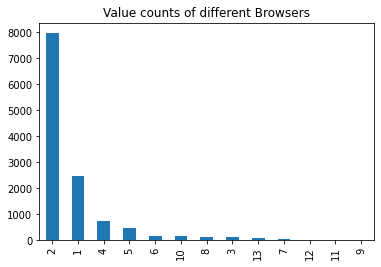

In [15]:
df['Browser'].value_counts().sort_values(ascending=False).plot(kind = 'bar', title="Value counts of different Browsers")


<AxesSubplot:title={'center':'Value counts of different Regions'}>

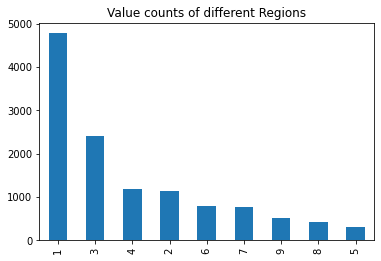

In [16]:
df['Region'].value_counts().sort_values(ascending=False).plot(kind = 'bar',title="Value counts of different Regions")


<AxesSubplot:title={'center':'Value counts of different OS'}>

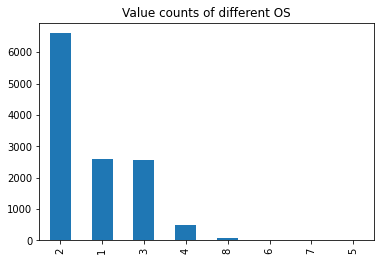

In [17]:
df['OperatingSystems'].value_counts().sort_values(ascending=False).plot(kind = 'bar',title="Value counts of different OS")


### I do not find important relationships that would make me think about modifying/dropping these fields. I do find results that could be useful to the company in a more general sense.
#### You can see that most of the traffic comes from 2 Browsers. This data can be useful for the frontend team (in case we have the info of which browsers they are). 
#### Also, from the OS field we can see that OS 2 is the most represented. 1 and 3 are evenly matched. Different marketing strategies could be studied depending on the OS. 
#### The Regions field presents many users from Region 1, although the imbalance is not as marked as in OS and Browsers.

## We can analyze the correlation matrix between the different numerical fields to see if there are fields that are highly correlated with each other.

In [32]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,stratify = df['Revenue'] ,test_size=0.2, random_state=43)
num_attr = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
            'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
corr2 = df_train[num_attr].corr('pearson')
corr2.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\teleski\AppData\Local\Temp\ipykernel_11644\2636470713.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr2.style.background_gradient(cmap='coolwarm').set_precision(2)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.00,0.60,0.38,0.25,0.44,0.38,-0.22,-0.32,0.10,-0.09
Administrative_Duration,0.60,1.00,0.31,0.25,0.30,0.37,-0.14,-0.21,0.07,-0.07
Informational,0.38,0.31,1.00,0.60,0.38,0.39,-0.12,-0.16,0.04,-0.05
Informational_Duration,0.25,0.25,0.60,1.00,0.29,0.36,-0.07,-0.10,0.03,-0.03
ProductRelated,0.44,0.30,0.38,0.29,1.00,0.86,-0.21,-0.29,0.06,-0.02
ProductRelated_Duration,0.38,0.37,0.39,0.36,0.86,1.00,-0.18,-0.25,0.05,-0.03
BounceRates,-0.22,-0.14,-0.12,-0.07,-0.21,-0.18,1.00,0.92,-0.12,0.06
ExitRates,-0.32,-0.21,-0.16,-0.10,-0.29,-0.25,0.92,1.00,-0.18,0.09
PageValues,0.10,0.07,0.04,0.03,0.06,0.05,-0.12,-0.18,1.00,-0.06
SpecialDay,-0.09,-0.07,-0.05,-0.03,-0.02,-0.03,0.06,0.09,-0.06,1.00


### We see that the colums Administrative, Informational and ProductRelated have a considerable Pearson correlation with the attributes of the same name but ended with _duration. Recall that these attributes indicate the number of pages of type Administrative, Informational and ProductRelated that the customer viewed before purchasing or leaving. The _duration indicates the duration in minutes of the customer's visit on each of these page types. It is to be expected that they show some degree of correlation.
### The BounceRates and ExitRates attributes show a high correlation with each other. BounceRates represents the % of customers who entered a specific page (without going through the site first) and closed without seeing a second page. ExitRates represents the % of customers who were browsing the site and on that specific page decided to terminate (leave the site).
### Due to the high correlation between attributes I am going to discard some of them, to reduce the dimensionality. Here I believe that as in any ML problem, the ideal would be to test different combinations of data with the same model, in an iterative process, until the best result is found.
### I am going to choose to stick with the Administrative, Informational and ProductRelated attributes (without _duration). My hypothesis is that the time spent looking at those pages can be due to many factors such as reading speed or concentration level at that moment, while the # of pages looked at is independent of that. Also, I prefer ExitRates over BounceRates as it considers customers who came to the site browsing the site, my hypothesis being that it contains more information than BounceRates which considers customers who came to a page and left.

### Finally, let's look for outliers

<AxesSubplot:>

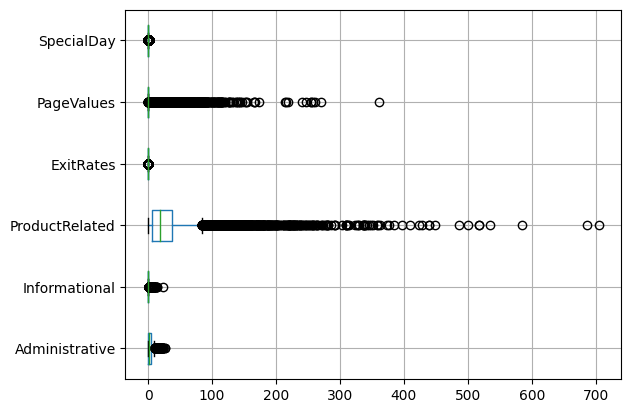

In [22]:
final_num_attr= ['Administrative', 'Informational', 'ProductRelated',  
        'ExitRates', 'PageValues', 'SpecialDay']
df_train[final_num_attr].boxplot(vert=False)



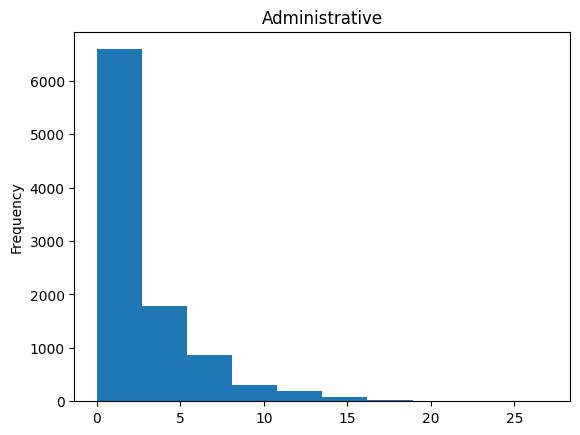

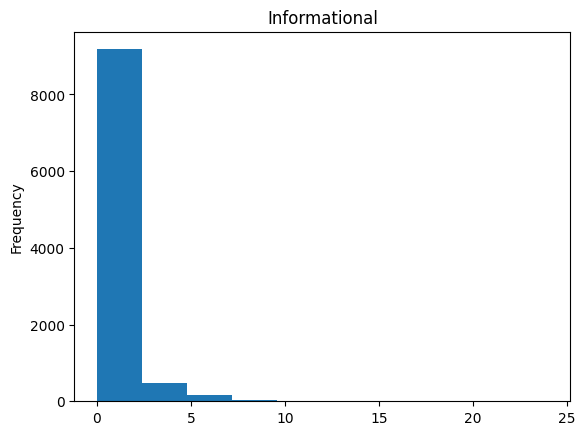

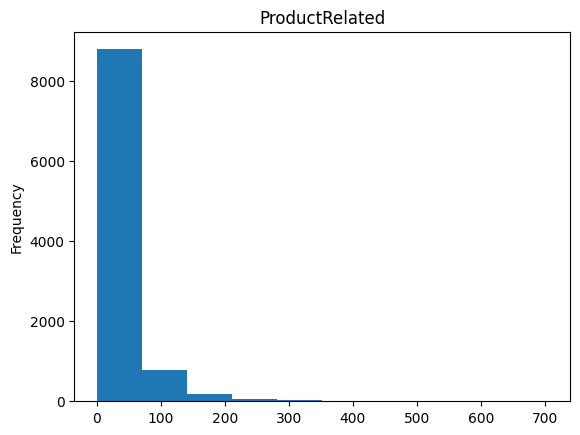

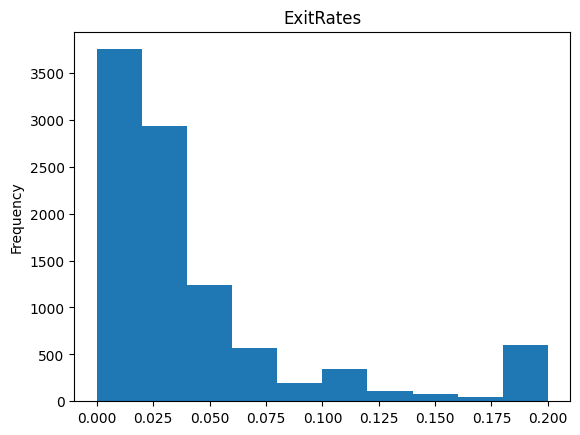

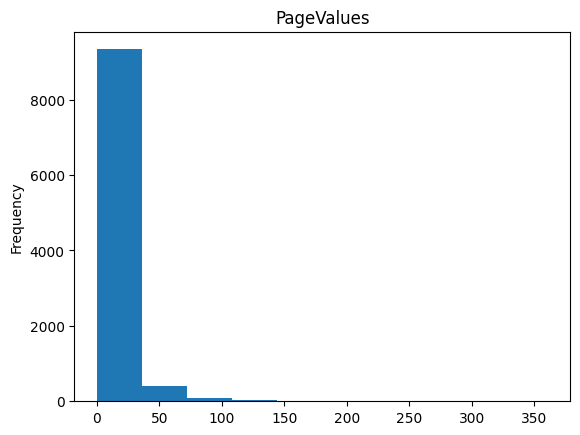

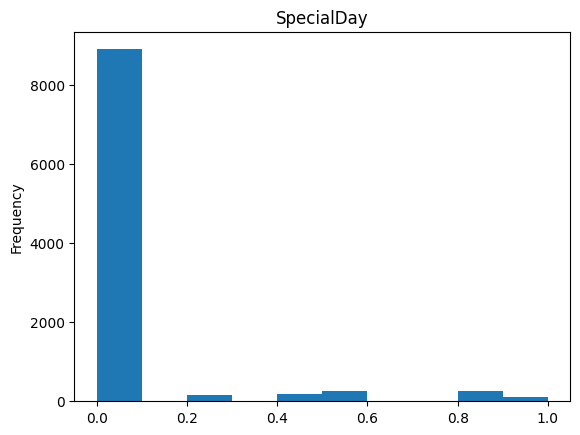

In [28]:
for attr in final_num_attr:
    df_train[attr].plot.hist(title=attr)
    plt.show()

## Preprocessing data

We begin by dropping previously mentioned columns 

In [33]:
drop_attr= ['Administrative_Duration','Informational_Duration','ProductRelated_Duration', 'BounceRates', 'Month']
df_train, df_test = df_train.drop(drop_attr, axis=1), df_test.drop(drop_attr,axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9864 entries, 9332 to 6707
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Administrative    9864 non-null   int64  
 1   Informational     9864 non-null   int64  
 2   ProductRelated    9864 non-null   int64  
 3   ExitRates         9864 non-null   float64
 4   PageValues        9864 non-null   float64
 5   SpecialDay        9864 non-null   float64
 6   OperatingSystems  9864 non-null   int64  
 7   Browser           9864 non-null   int64  
 8   Region            9864 non-null   int64  
 9   TrafficType       9864 non-null   int64  
 10  VisitorType       9864 non-null   object 
 11  Weekend           9864 non-null   bool   
 12  Revenue           9864 non-null   bool   
dtypes: bool(2), float64(3), int64(7), object(1)
memory usage: 944.0+ KB


### Transform weekend and revenue from False,True to 0,1

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Revenue'] = le.fit_transform(df_train['Revenue'])
df_test['Revenue'] = le.fit_transform(df_test['Revenue'])
df_train['Weekend'] = le.fit_transform(df_train['Weekend'])
df_test['Weekend'] = le.fit_transform(df_test['Weekend'])
print(df_train['Revenue'].value_counts())
print(df_train['Weekend'].value_counts())

0    8338
1    1526
Name: Revenue, dtype: int64
0    7555
1    2309
Name: Weekend, dtype: int64


### Transform VisitorType to OneHot

In [40]:
df_train_clean = pd.get_dummies(df_train)
df_test_clean = pd.get_dummies(df_test)

print(df_test_clean.info())
df_test_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2466 entries, 3128 to 4676
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 2466 non-null   int64  
 1   Informational                  2466 non-null   int64  
 2   ProductRelated                 2466 non-null   int64  
 3   ExitRates                      2466 non-null   float64
 4   PageValues                     2466 non-null   float64
 5   SpecialDay                     2466 non-null   float64
 6   OperatingSystems               2466 non-null   int64  
 7   Browser                        2466 non-null   int64  
 8   Region                         2466 non-null   int64  
 9   TrafficType                    2466 non-null   int64  
 10  Weekend                        2466 non-null   int64  
 11  Revenue                        2466 non-null   int64  
 12  VisitorType_New_Visitor        2466 non-null 

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
3128,0,0,5,0.040000,0.0,0.0,4,2,3,1,0,0,0,0,1
8320,2,0,20,0.013158,0.0,0.0,2,2,9,20,0,0,1,0,0
5351,0,0,5,0.060000,0.0,0.0,2,2,7,3,1,0,0,0,1
4797,3,0,8,0.072222,0.0,0.0,3,2,3,3,0,0,0,0,1
236,3,0,29,0.010600,0.0,0.0,3,2,1,8,1,0,0,0,1


### Create x and y for train and test

In [44]:
x_train = df_train_clean.drop('Revenue', axis=1)
y_train = df_train_clean['Revenue']
x_test = df_test_clean.drop('Revenue', axis=1)
y_test = df_test_clean['Revenue']

print(f'x_train shape {x_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'x_test shape {x_test.shape}')
print(f'y_test shape {y_test.shape}')


x_train shape (9864, 14)
y_train shape (9864,)
x_test shape (2466, 14)
y_test shape (2466,)


### I am going to train a random forest and an xgboost, since both are flexible and robust algorithms, and also allow me to observe the importance of the features. I would like to analyze that importance and retrain it using only the most important features in order to compare results.
### Due to the imbalance of data, I will analyze as main metrics the confusion matrix and the f1-score. I will also plot the ROC and Precision-Recall curves in order to compare the different models.
### Once a model has been chosen, we can calculate Gain and Lift curves to better understand how our model affects this purchase intention problem.

Los resultados para el set de training:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8338
           1       0.85      0.51      0.64      1526

    accuracy                           0.91      9864
   macro avg       0.88      0.75      0.79      9864
weighted avg       0.91      0.91      0.90      9864

Con una matriz de confusion:


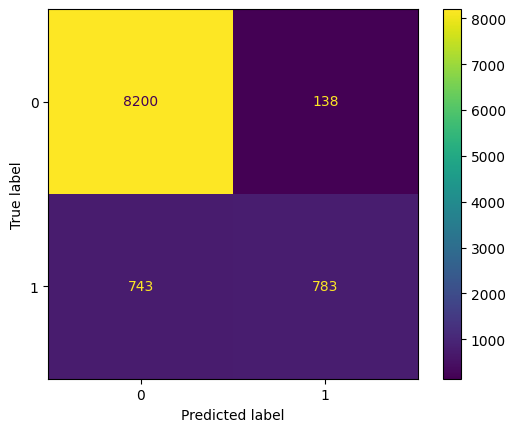

Los resultados para el set de testing:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2084
           1       0.79      0.49      0.61       382

    accuracy                           0.90      2466
   macro avg       0.85      0.73      0.78      2466
weighted avg       0.89      0.90      0.89      2466

Con una matriz de confusion:


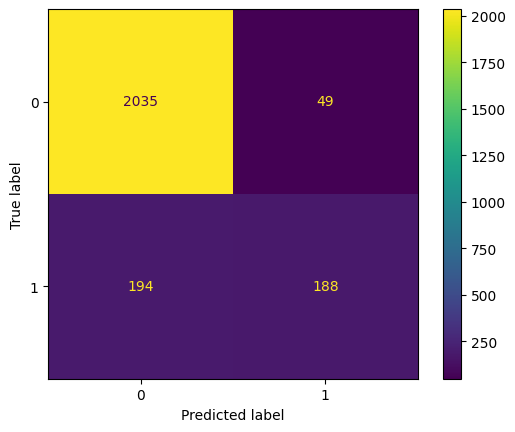

ROC AUC para RandomForestClassifier train 0.935557005508108
ROC AUC para RandomForestClassifier test 0.9166009285405634


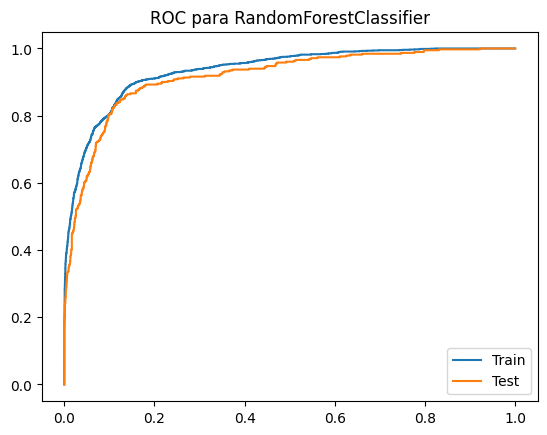

PR AUC para RandomForestClassifier train 0.7996294429086369
PR AUC para RandomForestClassifier test 0.7484687532550457


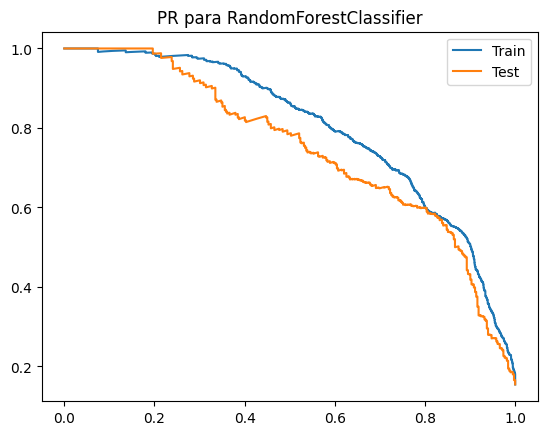

PageValues                       0.677032
ExitRates                        0.097918
ProductRelated                   0.075196
Administrative                   0.045604
Informational                    0.017032
TrafficType                      0.016378
VisitorType_New_Visitor          0.014461
VisitorType_Returning_Visitor    0.014024
Region                           0.011651
Browser                          0.011571
OperatingSystems                 0.008097
SpecialDay                       0.005541
Weekend                          0.004597
VisitorType_Other                0.000897
dtype: float64


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,precision_recall_curve, roc_auc_score, auc
rf = RandomForestClassifier(max_depth=7, random_state=0, n_estimators =100)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
print('Los resultados para el set de training:')
print(classification_report(y_train, y_train_pred))
print('Con una matriz de confusion:')
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                            display_labels=rf.classes_)
disp.plot()
plt.show()

y_test_pred = rf.predict(x_test)
print('Los resultados para el set de testing:')
print(classification_report(y_test, y_test_pred))
print('Con una matriz de confusion:')
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                            display_labels=rf.classes_)
disp.plot()
plt.show()

##Ahora ROC 
y_train_prob = rf.predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, y_train_prob[:, 1])

y_test_prob = rf.predict_proba(x_test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob[:, 1])

print('ROC AUC para RandomForestClassifier train', roc_auc_score(y_train, y_train_prob[:, 1]))
print('ROC AUC para RandomForestClassifier test', roc_auc_score(y_test,  y_test_prob[:, 1]))

plt.title('ROC para RandomForestClassifier')
plt.plot(fpr, tpr, label='Train')
plt.plot(fpr_test, tpr_test, label='Test')
plt.legend()
plt.show()

#Por ultimo Precision-Recall
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_prob[:, 1])
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_prob[:, 1])

print('PR AUC para RandomForestClassifier train', auc(recall_train,precision_train))
print('PR AUC para RandomForestClassifier test', auc(recall_test,precision_test))

plt.title('PR para RandomForestClassifier')
plt.plot(recall_train,precision_train, label='Train')
plt.plot(recall_test,precision_test, label='Test')
plt.legend()
plt.show()

## Feature importances
important_features = pd.Series(data=rf.feature_importances_,index=x_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)


In [67]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 3.9 MB/s eta 0:00:00


Los resultados para el set de training:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      8338
           1       0.88      0.70      0.78      1526

    accuracy                           0.94      9864
   macro avg       0.92      0.84      0.87      9864
weighted avg       0.94      0.94      0.94      9864

Con una matriz de confusion:


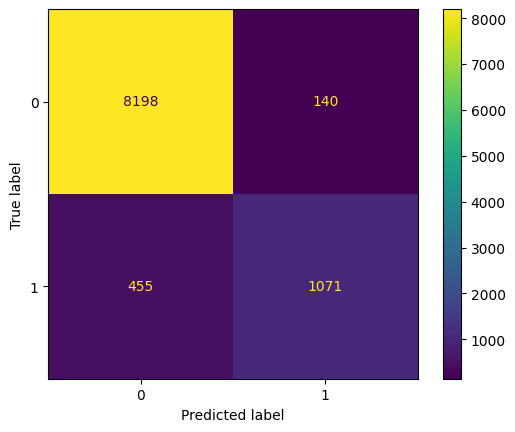

Los resultados para el set de testing:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2084
           1       0.73      0.60      0.66       382

    accuracy                           0.90      2466
   macro avg       0.83      0.78      0.80      2466
weighted avg       0.90      0.90      0.90      2466

Con una matriz de confusion:


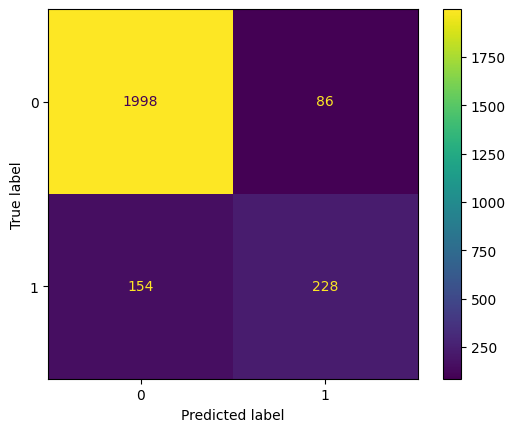

ROC AUC para XGBoost train 0.9644892700192741
ROC AUC para XGBoost test 0.9232810945523611


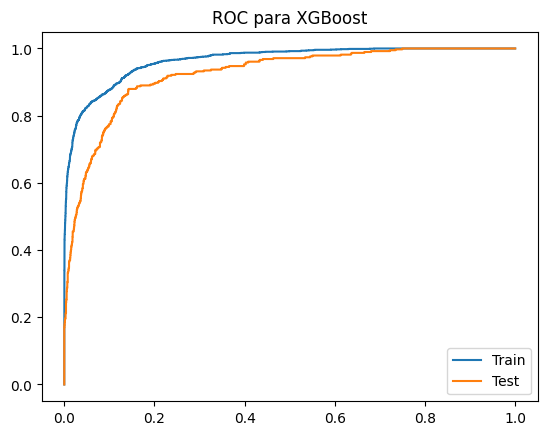

PR AUC para RandomForestClassifier train 0.8854320541668945
PR AUC para RandomForestClassifier test 0.7456964700637525


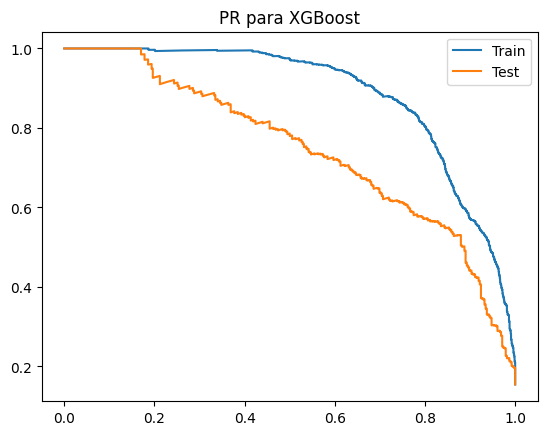

PageValues                       0.358967
VisitorType_Returning_Visitor    0.146155
SpecialDay                       0.074205
VisitorType_New_Visitor          0.071360
Administrative                   0.053460
ProductRelated                   0.049362
ExitRates                        0.046913
TrafficType                      0.039079
Weekend                          0.038816
Region                           0.031470
Browser                          0.028547
OperatingSystems                 0.025548
Informational                    0.022121
VisitorType_Other                0.013997
dtype: float32


In [73]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,precision_recall_curve, roc_auc_score, auc
xgb_clf = XGBClassifier(objective='binary:logistic',random_state=0, max_depth=4)
xgb_clf.fit(x_train, y_train)

y_train_pred = xgb_clf.predict(x_train)
print('Los resultados para el set de training:')
print(classification_report(y_train, y_train_pred))
print('Con una matriz de confusion:')
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                            display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

y_test_pred = xgb_clf.predict(x_test)
print('Los resultados para el set de testing:')
print(classification_report(y_test, y_test_pred))
print('Con una matriz de confusion:')
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                            display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

##Ahora ROC 
y_train_prob = xgb_clf.predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, y_train_prob[:, 1])

y_test_prob = xgb_clf.predict_proba(x_test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob[:, 1])

print('ROC AUC para XGBoost train', roc_auc_score(y_train, y_train_prob[:, 1]))
print('ROC AUC para XGBoost test', roc_auc_score(y_test,  y_test_prob[:, 1]))

plt.title('ROC para XGBoost')
plt.plot(fpr, tpr, label='Train')
plt.plot(fpr_test, tpr_test, label='Test')
plt.legend()
plt.show()

#Por ultimo Precision-Recall
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_prob[:, 1])
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_prob[:, 1])

print('PR AUC para RandomForestClassifier train', auc(recall_train,precision_train))
print('PR AUC para RandomForestClassifier test', auc(recall_test,precision_test))

plt.title('PR para XGBoost')
plt.plot(recall_train,precision_train, label='Train')
plt.plot(recall_test,precision_test, label='Test')
plt.legend()
plt.show()

## Feature importances
important_features = pd.Series(data=xgb_clf.feature_importances_,index=x_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

### Looking at the feature importances for both models, we see that PageValues is the most important. Then, XGBoost values VisitorType and SpecialDay more, while RandomForest ExitRates and ProductRelated.
### In both models the features VisitorTypeOther, Informational, OperatingSystems, Browser, Weekend and Region have low importance. We are going to test eliminating these features to see if we can prevent some of the overfitting that can be seen, especially in XGBoost.

In [78]:
drop_features=['VisitorType_Other', 'Informational', 'OperatingSystems','Browser', 'Weekend' , 'Region']
x_train_clean = x_train.drop(drop_features, axis=1)
x_test_clean = x_test.drop(drop_features, axis=1)
x_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2466 entries, 3128 to 4676
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 2466 non-null   int64  
 1   ProductRelated                 2466 non-null   int64  
 2   ExitRates                      2466 non-null   float64
 3   PageValues                     2466 non-null   float64
 4   SpecialDay                     2466 non-null   float64
 5   TrafficType                    2466 non-null   int64  
 6   VisitorType_New_Visitor        2466 non-null   uint8  
 7   VisitorType_Returning_Visitor  2466 non-null   uint8  
dtypes: float64(3), int64(3), uint8(2)
memory usage: 139.7 KB


Los resultados para el set de training:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8338
           1       0.82      0.54      0.65      1526

    accuracy                           0.91      9864
   macro avg       0.87      0.76      0.80      9864
weighted avg       0.90      0.91      0.90      9864

Con una matriz de confusion:


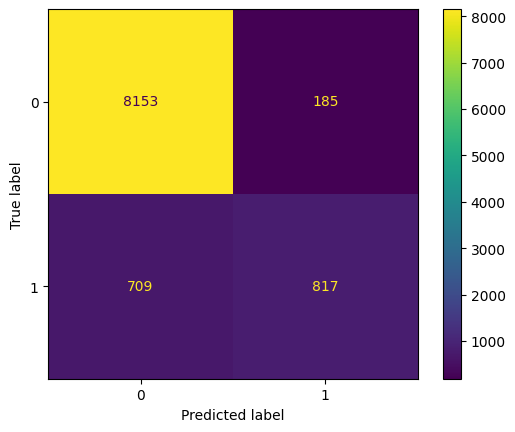

Los resultados para el set de testing:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2084
           1       0.77      0.50      0.61       382

    accuracy                           0.90      2466
   macro avg       0.84      0.74      0.77      2466
weighted avg       0.89      0.90      0.89      2466

Con una matriz de confusion:


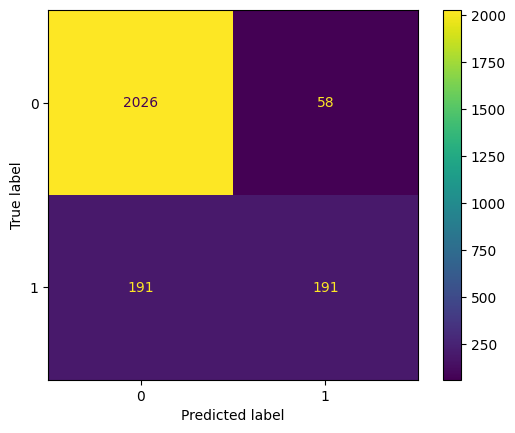

ROC AUC para RandomForestClassifier train 0.9343142545286043
ROC AUC para RandomForestClassifier test 0.9173401684235913


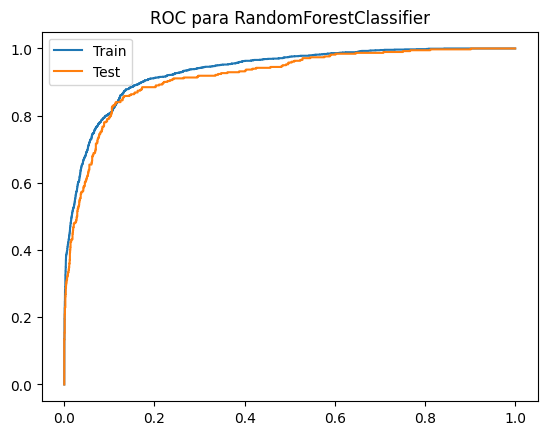

PR AUC para RandomForestClassifier train 0.7914887169719332
PR AUC para RandomForestClassifier test 0.7475208881176273


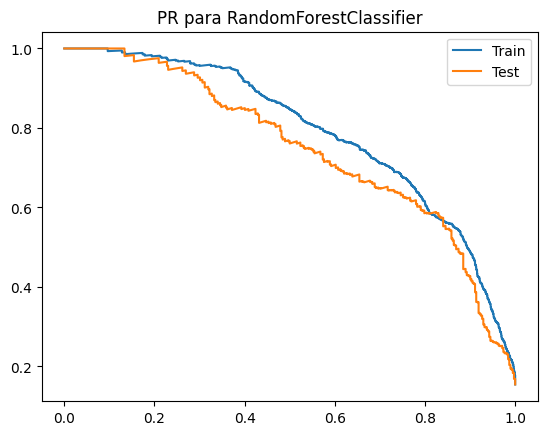

PageValues                       0.701274
ExitRates                        0.105164
ProductRelated                   0.080329
Administrative                   0.056622
TrafficType                      0.018875
VisitorType_Returning_Visitor    0.014675
VisitorType_New_Visitor          0.014417
SpecialDay                       0.008644
dtype: float64


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,precision_recall_curve, roc_auc_score, auc
rf = RandomForestClassifier(max_depth=7, random_state=0, n_estimators =100)
rf.fit(x_train_clean, y_train)

y_train_pred = rf.predict(x_train_clean)
print('Los resultados para el set de training:')
print(classification_report(y_train, y_train_pred))
print('Con una matriz de confusion:')
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                            display_labels=rf.classes_)
disp.plot()
plt.show()

y_test_pred = rf.predict(x_test_clean)
print('Los resultados para el set de testing:')
print(classification_report(y_test, y_test_pred))
print('Con una matriz de confusion:')
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                            display_labels=rf.classes_)
disp.plot()
plt.show()

##Ahora ROC 
y_train_prob = rf.predict_proba(x_train_clean)
fpr, tpr, _ = roc_curve(y_train, y_train_prob[:, 1])

y_test_prob = rf.predict_proba(x_test_clean)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob[:, 1])

print('ROC AUC para RandomForestClassifier train', roc_auc_score(y_train, y_train_prob[:, 1]))
print('ROC AUC para RandomForestClassifier test', roc_auc_score(y_test,  y_test_prob[:, 1]))

plt.title('ROC para RandomForestClassifier')
plt.plot(fpr, tpr, label='Train')
plt.plot(fpr_test, tpr_test, label='Test')
plt.legend()
plt.show()

#Por ultimo Precision-Recall
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_prob[:, 1])
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_prob[:, 1])

print('PR AUC para RandomForestClassifier train', auc(recall_train,precision_train))
print('PR AUC para RandomForestClassifier test', auc(recall_test,precision_test))

plt.title('PR para RandomForestClassifier')
plt.plot(recall_train,precision_train, label='Train')
plt.plot(recall_test,precision_test, label='Test')
plt.legend()
plt.show()

## Feature importances
important_features = pd.Series(data=rf.feature_importances_,index=x_train_clean.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

Los resultados para el set de training:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8338
           1       0.88      0.71      0.78      1526

    accuracy                           0.94      9864
   macro avg       0.91      0.84      0.87      9864
weighted avg       0.94      0.94      0.94      9864

Con una matriz de confusion:


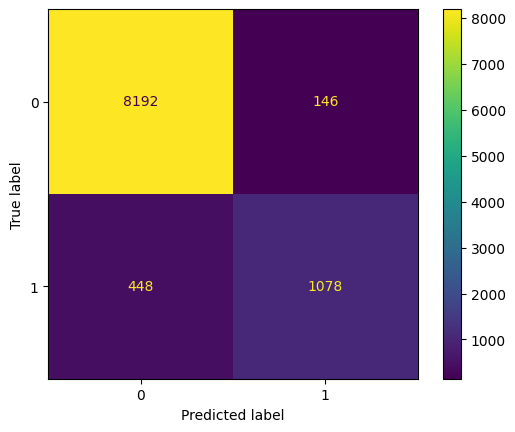

Los resultados para el set de testing:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.71      0.56      0.63       382

    accuracy                           0.90      2466
   macro avg       0.82      0.76      0.78      2466
weighted avg       0.89      0.90      0.89      2466

Con una matriz de confusion:


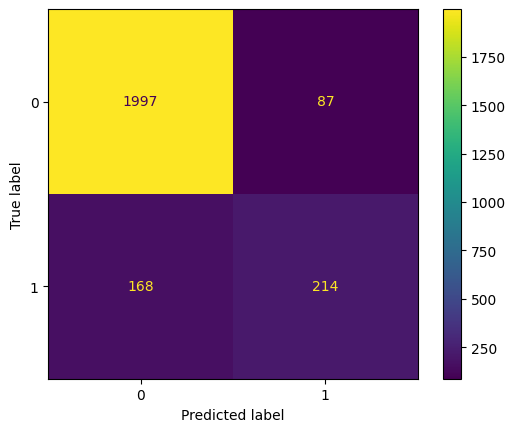

ROC AUC para XGBoost train 0.9586473383555274
ROC AUC para XGBoost test 0.918004039754399


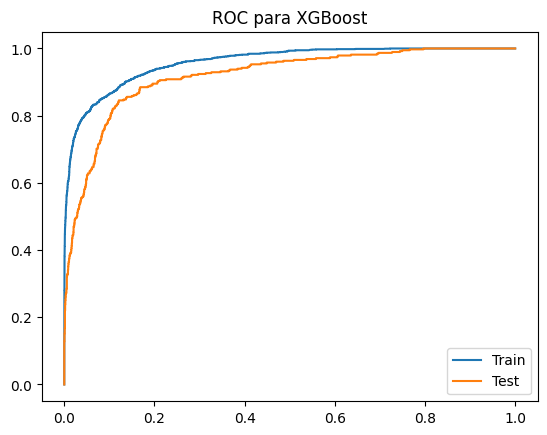

PR AUC para RandomForestClassifier train 0.8722919570710259
PR AUC para RandomForestClassifier test 0.7428158456305849


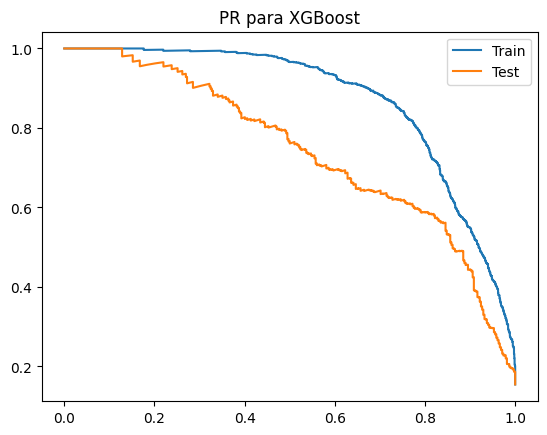

PageValues                       0.424552
VisitorType_Returning_Visitor    0.205877
VisitorType_New_Visitor          0.080411
SpecialDay                       0.074140
Administrative                   0.060317
ProductRelated                   0.060169
ExitRates                        0.054882
TrafficType                      0.039651
dtype: float32


In [84]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,precision_recall_curve, roc_auc_score, auc
xgb_clf = XGBClassifier(objective='binary:logistic',random_state=0, max_depth=4)
xgb_clf.fit(x_train_clean, y_train)

y_train_pred = xgb_clf.predict(x_train_clean)
print('Los resultados para el set de training:')
print(classification_report(y_train, y_train_pred))
print('Con una matriz de confusion:')
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                            display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

y_test_pred = xgb_clf.predict(x_test_clean)
print('Los resultados para el set de testing:')
print(classification_report(y_test, y_test_pred))
print('Con una matriz de confusion:')
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                            display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

##Ahora ROC 
y_train_prob = xgb_clf.predict_proba(x_train_clean)
fpr, tpr, _ = roc_curve(y_train, y_train_prob[:, 1])

y_test_prob = xgb_clf.predict_proba(x_test_clean)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob[:, 1])

print('ROC AUC para XGBoost train', roc_auc_score(y_train, y_train_prob[:, 1]))
print('ROC AUC para XGBoost test', roc_auc_score(y_test,  y_test_prob[:, 1]))

plt.title('ROC para XGBoost')
plt.plot(fpr, tpr, label='Train')
plt.plot(fpr_test, tpr_test, label='Test')
plt.legend()
plt.show()

#Por ultimo Precision-Recall
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_prob[:, 1])
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_prob[:, 1])

print('PR AUC para RandomForestClassifier train', auc(recall_train,precision_train))
print('PR AUC para RandomForestClassifier test', auc(recall_test,precision_test))

plt.title('PR para XGBoost')
plt.plot(recall_train,precision_train, label='Train')
plt.plot(recall_test,precision_test, label='Test')
plt.legend()
plt.show()

## Feature importances
important_features = pd.Series(data=xgb_clf.feature_importances_,index=x_train_clean.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

### From the results we can conclude that: 
#### The model with the best results obtained is the XGBoost model trained without the last drop of less important features. It presents better f1 score and ROC AUC than the others, with a similar value in terms of PR AUC.
#### Dropping the less important features did not considerably decrease the overfitting, which is more noticeable in XGBoost (there is a larger difference between the f1 score, ROC AUC and PR AUC of train and test than for the RandomForestClassifier).
#### As future work, it would be interesting to thoroughly analyze the outliers, understand (if possible) how the data were taken, decide on some strategy such as: if the PageValues value >150, cap that number to 150. Also, while I manually performed a test of some hyperparameters such as max_depth and n_estimators, it may be beneficial to perform an exhaustive search (either grid or random) of other hyperparameters of the models. Particularly for XGBoost, parameters such as gamma, learning rate and colsample_bytree can help reduce overfitting.

## Finally, let's analyze the gain and lift metrics for the best model obtained.

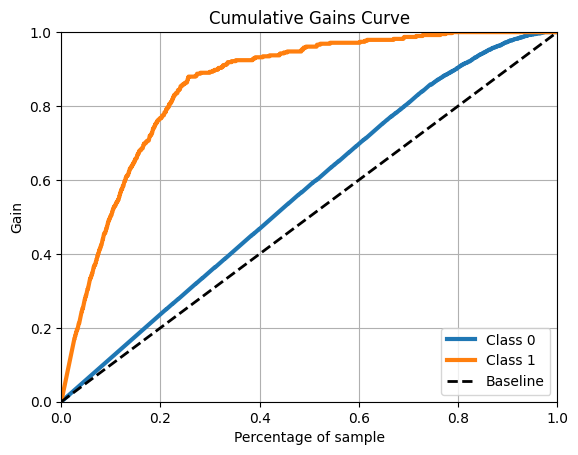

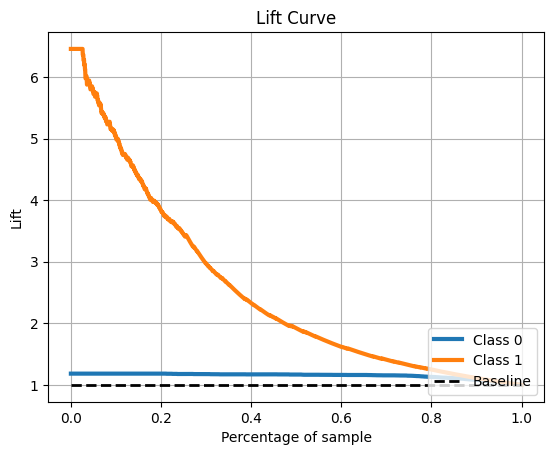

In [96]:
import scikitplot as skplt

xgb_clf = XGBClassifier(objective='binary:logistic',random_state=0, max_depth=4)
xgb_clf.fit(x_train, y_train)


y_test_prob = xgb_clf.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test, y_test_prob)
plt.show()

skplt.metrics.plot_lift_curve(y_test, y_test_prob)
plt.show()


### We see that we have a lift of about 4 for decile 2 for class 1 (customers who will buy). This indicates that we are 4 times more likely to find customers who will make a purchase with our model than by choosing randomly. The same is seen in the Gain curve, with approximately 80% of the customers in 20% of the sample.